#**EE769 Introduction to Machine Learning**

#Programming Assignment – 3 : Deep Learning and Unsupervised Learning


**Name:** Prafull Pratap Bhosale

**Roll No.** 203010005

**Name:** Ojaswini Bhardwaj

**Roll No.** 213300011

# Q2: Clustering and Visualization

<img src="https://digmet.files.wordpress.com/2014/12/step2-nsa-netvizz.png" width="650px" height="650px"/> 

# Clustering

This code is highly borrowed from https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters/notebook

Changes done by us:


1.   Skewed data transformation
2.   During plotting clusters used loops



## Contents
1. [Imports:](#1)
1. [Upload data from Google drive:](#2)
1. [Read the Data:](#3)
1. [Exploration/Engineering:](#4)
1. [Clustering:](#5)
1. [T-Distributed Stochastic Neighbor Embedding (T-SNE):](#7)
1. [Conclusion:](#8)
1. [Closing Remarks:](#9)

<a id="2"></a>
# Imports:

In [ ]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn.metrics import davies_bouldin_score

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
import matplotlib.pyplot as plt

<a id="3"></a>
# Read the data from URL

In [ ]:
#df is our original DataFrame
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv")

<a id="4"></a>
# Exploration/Engineering:

First, we construct a new DataFrame, `X` that we can modify. `X` will begin as a 'copy' of the original DataFrame, `df`.

In [ ]:
X = df.copy()

Any missing values?

In [ ]:
X.isnull().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

Sweet! No missing values. That saves us quite a bit of work.

In [ ]:
X.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


## Plot given data

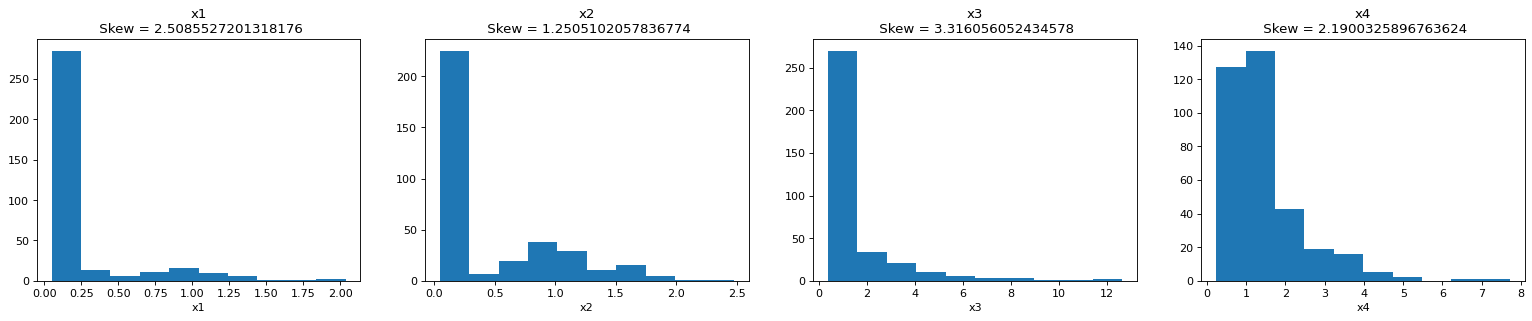

In [ ]:
plt.figure(figsize=(24, 4), dpi=80)
cols_to_transform = []
i=1
for col in X.columns.values:
  colSkew = X[col].skew()
  pltTitle = col + '\n Skew = ' + str(X[col].skew())
  plt.subplot(1, len(X.columns), i).set_title(pltTitle) # index 2
  i = i+1
  plt.hist(X[col])
  plt.xlabel(col)
  if (abs(colSkew) > 0.6):
    cols_to_transform.append(col)
  #print(col + ': Skew = ', X[col].skew())

plt.show()

## Columns are highly skewed. So, we have to apply some transformation like log, exp or power to make it nearly Gaussian


Here we use boxcox function from scipy:

The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda:

lambda = -1. is a reciprocal transform

lambda = -0.5 is a reciprocal square root transform

lambda = 0.0 is a log transform.

lambda = 0.5 is a square root transform

lambda = 1.0 is no transform

Ref: https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/


In [ ]:
from scipy.stats import boxcox

Skew after transformation


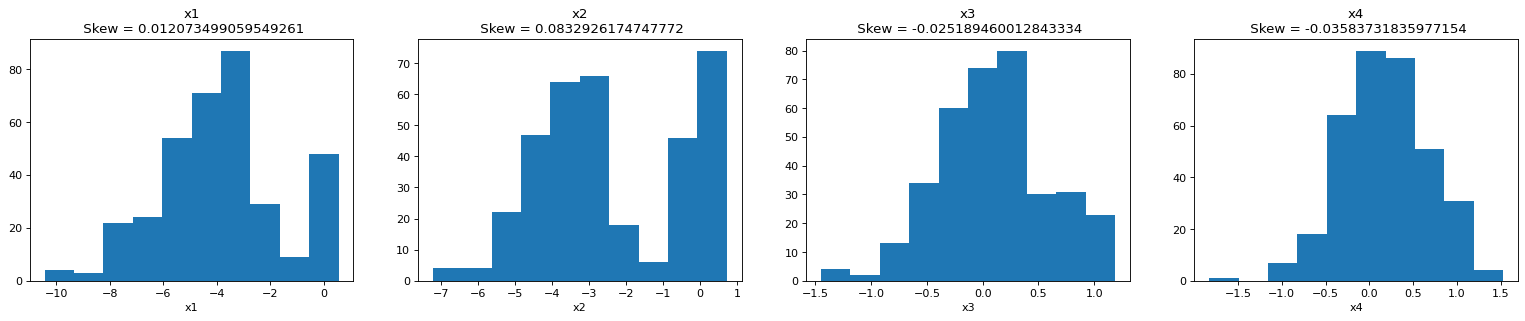

In [ ]:
# X_transformed = np.log(X + 1 - np.min(X)) # apply log transformation for highly skewed columns
# X_transformed = np.power(X, 0.1)
# X_transformed = np.power(X,0.01)
# X_transformed = np.log(X)
# X_transformed = np.power(X_transformed,0.5)

X_transformed = pd.DataFrame()

X_transformed['x1'] = boxcox(X['x1'], -0.7)
X_transformed['x2'] = boxcox(X['x2'], -0.5) # reciprocal square root transform
X_transformed['x3'] = boxcox(X['x3'], -0.7)
X_transformed['x4'] = boxcox(X['x4'], -0.3)

i=1
print('Skew after transformation')
plt.figure(figsize=(24, 4), dpi=80)
for col in X_transformed.columns.values:
  #X_transformed[col] = boxcox(X[col], -5)
  pltTitle = col + '\n Skew = ' + str(X_transformed[col].skew())
  plt.subplot(1, len(X_transformed.columns), i).set_title(pltTitle) # index 2
  i = i+1
  plt.hist(X_transformed[col])
  plt.xlabel(col)
  #print(col + ': Skew = ', X[col].skew())

plt.show()

# Feature-scaling

In [ ]:
#Initialize our scaler
scaler = StandardScaler()

In [ ]:
#Scale each column in numer
X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
X.columns = ["x1_scaled", "x2_scaled", "x3_scaled", "x4_scaled"]

<a id="5"></a>
# Clustering:

**Time to build our clusters.**

In this kernel, we will be visualizing only three different clusters on our data. I chose three because I found it to be a good number of clusters to help us visualize our data in a non-complicated way.

## Finding optimum number of clusters
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

### Elbow method

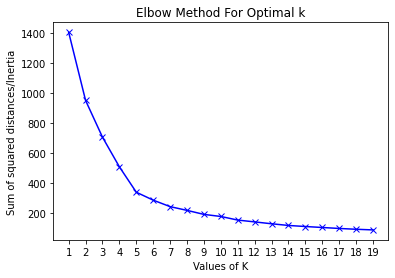

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.xticks(np.arange(1,20,1))
plt.show()

**Observations:**
The curve looks like an elbow. In the above plot, the elbow is approximately at k=5 (i.e. Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 5

### Silhoutte analysis

In [ ]:
from sklearn.metrics import silhouette_score

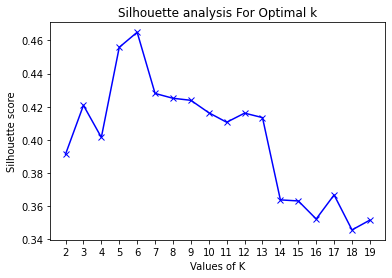

In [ ]:
range_n_clusters = np.arange(2,20,1)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters,random_state=30)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.xticks(range_n_clusters)
plt.show()

**Observations:**
We see that the silhouette score is maximized at k = 6. So, optimum number of clusters according to Silhoutte analysis are 6.

### Davis - Bouldin index

Ref:
[Davies-Bouldin Index for K-Means Clustering Evaluation in Python](https://pyshark.com/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/#:~:text=The%20Davies%2DBouldin%20index%20(DBI,a%20given%20number%20of%20clusters)

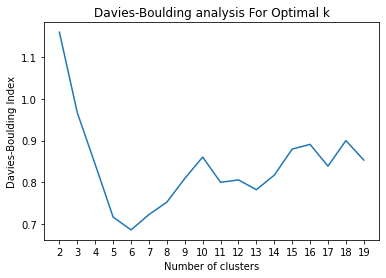

In [ ]:
results = {}

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.title('Davies-Boulding analysis For Optimal k')
plt.xticks(range_n_clusters)
plt.show()


**Observations:**
We can observe that choosing 6 clusters minimizes the similarity measure. So, optimum number of clusters according to Davis-Bouldin analysis are **6**.

In [ ]:
n_clusters = 6

In [ ]:
#Initialize our model
kmeans = KMeans(n_clusters=n_clusters)

In [ ]:
#Fit our model
kmeans.fit(X)

KMeans(n_clusters=6)

In [ ]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters

Now that we have our clusters, we can begin visualizing our data!

# Visualizing the clusters

<a id="7"></a>
## T-Distributed Stochastic Neighbor Embedding (T-SNE):

T-SNE is an interesting and complicated machine learning algorithm that can help us visualize high-dimensional data. It is a method for performing dimensionality reduction, and it is for this reason that we can use it to help us visualize our clusters that were built on high-dimensional data.

Note: And just like before, we will use this algorithm to visualize our data in [**2-D**](#T-SNE_2D), and [**3-D**](#T-SNE_3D) space!

Once again, we create a sub-DataFrame called `plotX` that will hold a sample of the data from `X` for the purpose of visualization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
#plotX will hold the values we wish to plot
plotX = X

Next up, we have to decide what level of `perplexity` we would like to use for our T-SNE algorithm. The `perplexity` is a hyperparameter used in the T-SNE algorithm that greatly determines how the data returned from the algorithm is distributed.

To see the role that `perplexity` plays in shaping the distibution of the data through T-SNE, check out this clearly written, and interactive [article](https://distill.pub/2016/misread-tsne/) by some of the Engineers/Scientists at [Google Brain](https://ai.google/research/teams/brain).

One of the feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has.

As per sklearn TSNE documentation (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) the recommended value of `perplexity` is between 5 to 50. But we decided to check cluster plots for `perplexity` values 2,5,10,20,30,50,100

In [ ]:
def TSNE_ClusterAssign(plotX, perplexity):
  """We initialize our T-SNE models:"""

  #T-SNE with two dimensions
  tsne_2d = TSNE(n_components=2, init='pca', random_state=1,  learning_rate='auto', perplexity=perplexity)

  #T-SNE with three dimensions
  tsne_3d = TSNE(n_components=3, init='pca', random_state=1,  learning_rate='auto', perplexity=perplexity)

  """We build our new DataFrames to help us visualize our data in 1-D, 2-D, and 3-D space:"""

  #This DataFrame contains two dimensions, built by T-SNE
  TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

  #And this DataFrame contains three dimensions, built by T-SNE
  TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

  """(Note that, above, we performed our T-SNE algorithms on data that *exluded* the `Cluster` variable.)

  Rename the columns of these newly created DataFrames:
  """

  #"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
  #And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
  TCs_2d.columns = ["TC1_2d","TC2_2d"]

  TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

  """We concatenate these newly created DataFrames to `plotX` so that they can be used by `plotX` as columns."""

  plotX_ = pd.concat([plotX,TCs_2d,TCs_3d], axis=1, join='inner')

  """And we create one new column for `plotX` so that we can use it for 1-D visualization."""

  plotX_["dummy"] = 0

  """Now we divide our DataFrame, `plotX`, into three new DataFrames.

  Each of these new DataFrames will hold all of the values contained in exacltly one of the clusters. For example, all of the values contained within the DataFrame, `cluster0` will belong to 'cluster 0', and all the values contained in DataFrame, `cluster1` will belong to 'cluster 1', etc.
  """

  clusters = []
  for i in range(n_clusters):
    clusters.append(plotX_[plotX_["Cluster"] == i])

  return clusters

In [ ]:
clusters = []
perplex_arr = [2,5,30,50,100]
for i in range(len(perplex_arr)):
  clusters.append(TSNE_ClusterAssign(plotX, perplex_arr[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

T

### 2-D visualization

In [ ]:
def TSNE_Visu2D(clusters,perplexity,ax):
  ### T-SNE Visualizations:

  ### 2-D Visualization:
  #The next plot displays the three clusters on the two dimensions created by T-SNE for 2-D visualization:

  #Instructions for building the 2-D plot

#  data = []
  legend_Names = []
  for i in range(n_clusters):
    ax.scatter(clusters[i]["TC1_2d"],clusters[i]["TC2_2d"])
    ax.set_title("Perplexity: " + str(perplexity))
    #plt.scatter(clusters[i]["TC1_2d"],clusters[i]["TC2_2d"])
    legend_Names.append("Cluster " + str(i))
  ax.legend(legend_Names,bbox_to_anchor =(0.5,-0.5), loc='lower center')
  
#    data.append(go.Scatter(
#                      x = clusters[i]["TC1_2d"],
#                      y = clusters[i]["TC2_2d"],
#                      mode = "markers",
#                      name = "Cluster " + str(i),
#                      text = None))
#
#  title = "Visualizing Clusters in 2-D Using T-SNE (perplexity=" + str(perplexity) + ")"
#
#  layout = dict(title = title,
#                xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
#                yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
#               )
#
#  fig = dict(data = data, layout = layout)
#
#  fig = go.Figure( fig )
#  fig.update_layout(autosize=True)
#  fig.show(renderer="colab")

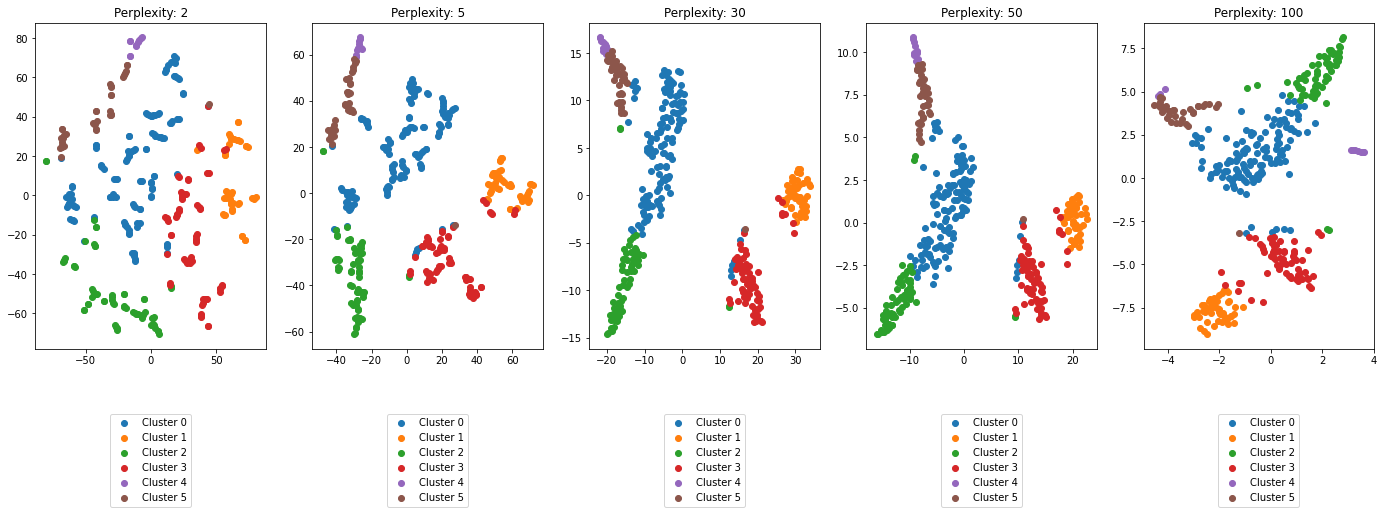

In [ ]:
# 2D plots
fig, axs = plt.subplots(1, len(perplex_arr))
fig.set_figheight(6)
fig.set_figwidth(24)
for i in range(len(perplex_arr)):
  TSNE_Visu2D(clusters[i],perplex_arr[i],axs[i])
plt.show()

Ref:

[Creating multiple subplots using plt.subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

[Put legend outside plot matplotlib](https://pythonguides.com/put-legend-outside-plot-matplotlib/#:~:text=Python%20Matplotlib%20tick_params-,Matplotlib%20set%20legend%20outside%20plot,the%20bbox_to_anchor%20attribute%20to%20it.&text=We%20use%20the%20bbox_to_anchor%3D(,the%20coordinates%20of%20the%20legend)

### 3-D visualization

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
def TSNE_Visu3D(clusters,perplexity,ax):
  ### T-SNE Visualizations:

  #3-D Visualization:
  #This last plot below displays our clusters on the three dimensions created by T-SNE for 3-D visualization:
  #Instructions for building the 3-D plot
  legend_Names = []
  for i in range(n_clusters):
    ax.scatter(clusters[i]["TC1_3d"],clusters[i]["TC2_3d"],clusters[i]["TC3_3d"])
    ax.set_title("Perplexity: " + str(perplexity),x=0.5, y=1.1)
    legend_Names.append("Cluster " + str(i))
  
  ax.legend(legend_Names,bbox_to_anchor =(0.5,-0.4), loc='lower center')

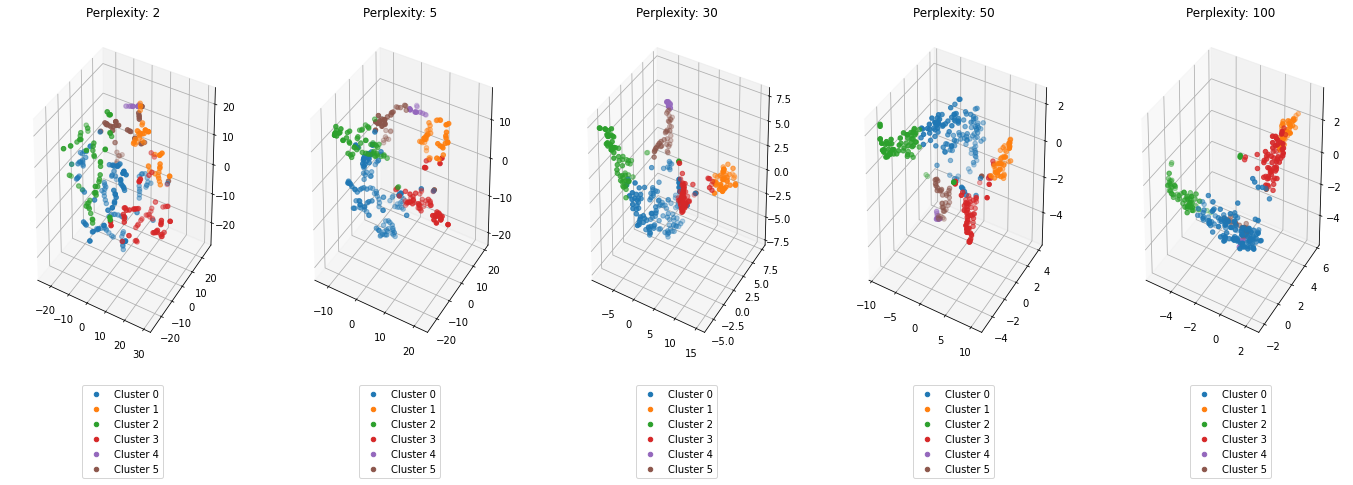

In [ ]:
# Plot in 3-D
fig = plt.figure(figsize=(24,6))
for i in range(len(perplex_arr)):
  ax = fig.add_subplot(1,len(perplex_arr), i+1, projection='3d')
  TSNE_Visu3D(clusters[i],perplex_arr[i],ax)
plt.show()


Ref:

https://plotly.com/python/subplots/

https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-matplotlib

### 3-D visualization (interactive)

In [ ]:
def TSNE_Visu3D_Int(clusters,perplexity):
  ### T-SNE Visualizations:

  #3-D Visualization:
  #This last plot below displays our clusters on the three dimensions created by T-SNE for 3-D visualization:
  #Instructions for building the 3-D plot

  data = []
  
  for i in range(n_clusters):
    data.append(go.Scatter3d(
                      x = clusters[i]["TC1_3d"],
                      y = clusters[i]["TC2_3d"],
                      z = clusters[i]["TC3_3d"],
                      mode = "markers",
                      name = "Cluster " + str(i),
                      text = None))
  
  
  title = "Visualizing Clusters in 3-D Using T-SNE (perplexity=" + str(perplexity) + ")"
  
  layout = dict(title = title,
                xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
                yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
               )
  
  fig = dict(data = data, layout = layout)
  
  fig = go.Figure( fig )
  fig.update_layout(autosize=True)
  fig.show(renderer="colab")

### Interactive 3d plot

In [ ]:
#fig = make_subplots(rows=1, cols=len(perplex_arr))
for i in range(len(perplex_arr)):
  TSNE_Visu3D_Int(clusters[i],perplex_arr[i])

Reference: https://distill.pub/2016/misread-tsne/

**Observations:**


1.   With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters.
2. For lower values of perplexity local variations dominate.
2.   For perplexity 50 and 100 we can see similar number of clusters but with some different configuration.
3. The perplexity value of 50 was good for this current dataset.
4. Due to isotropic nature of k-means clustering k-means cannot capture clusters with some odd shapes.

**Thus, we can visualize 6 clusters using TSNE.**



<a id="8"></a>
# Conclusion:

So there you have it: two interesting methods to view clusters formed on high-dimensional data.
One method was the standard and reliable PCA algorithm, and the other method was the somewhat more interesting and exotic T-SNE algorithm.

Both algorithms definitely have their own strengths and weaknesses when it comes to performing this task, and I'd imagine that the effectiveness of each algorithm depends largely on the type of data being given. So, in the end, it's largely up to the user which algorithm he or she prefers to use when visualizing clusterings on high-dimensional data.